<a href="https://colab.research.google.com/github/RafaelNovais/MasterAI/blob/master/Assignment_2_Periphery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CT5132 / CT5148 Assignment 2: Periphery

**Summary**: In this assignment, you have to investigate, explain, and implement one or more methods of finding the **periphery** of a dataset. The periphery doesn't have a single definition, so you have some freedom to look at different definitions and approaches.

You are allowed to use any sources and resources you like, including code and documents from the internet, existing libraries, and generative AI methods.

**Due date**: as announced on Canvas.

**Weight**: this assignment is worth 20% of the module.

**Groups**: you may work in a group of 1 (solo), 2, or 3, but you must not work with any student you previously worked with in any assignment in this module or any other module.

If working in a group:
* You must notify the lecturer by email 2 weeks before the due date, cc-ing all students in the group, and state that you have not worked together in any other assignment.
* Students in a group must work together on all aspects -- you cannot split tasks up so that one student doesn't understand how another student's part of the project works.
* All students in the group must submit and the submissions must be identical.
* All communication should cc all group members.

**Resources**:

* You may use code you find on the internet, but you must clearly cite the URL and clearly mark which parts of your solution are from that URL.
* You may use code completion and generative AI methods, such as GitHub Copilot and ChatGPT. When doing so you must clearly document your methodology when using it, eg the system(s) you use, the prompts, how you notice when the AI gets things wrong, how you improve it, etc. You must clearly document which parts of your submission come from generative AI.
* You may discuss with other students/groups, but you may not show your work to them or view their work.

**Interviews**: Post-submission vivas will be used in some cases to give students an opportunity to demonstrate their learning.

**Grading**: A basic solution (one simple method, based on a single source, demonstrated on one dataset, with short explanation) will be enough for a pass grade. For a very high grade, you can add more value by, for example:

* Investigating multiple methods,
* describing your methods correctly,
* implementing and comparing them (results, visualisations, pros and cons),
* on multiple datasets with different properties;
* providing a sophisticated account of the use of generative AI;
* integrating information from multiple sources;
* implementing your methods as Scikit-Learn estimators (NB: for some approaches to the problem there is no "right answer", so we may or may not need to implement `score`),
* with clean code and appropriate documentation and comments;
* with vectorisation where appropriate;
* describing the run-time or computational complexity.

These are examples of how you can add value, not an exhaustive list.

**NB**: some approaches to the problem are based on machine learning, but others are not. This is not a machine learning module, so you are not obliged to choose any machine learning methods.

There is no lower or upper bound on word-count or line-count. However, a high-quality submission with 3 methods and 3 datasets could be done in less than 100 lines and less than 1000 words.

**Submission**: submit an `ipynb` file containing code, results, and explanations. If you need to submit any data files as well, you can submit a `zip` file. Include your name and ID.

**Rafael Novais de Melo -
23113607**

### Problem definition

Given a dataset of points `X` of shape `(n_samples, n_features)`, the **periphery** is a subset of those points which are in some sense "on the border", or "outside the main dataset". The image below shows one possible conception of the periphery. I created it by hand for this dataset. Your job is to investigate methods of doing it automatically for any dataset. Some relevant ideas include the **convex hull**, **anomaly detection**, **outliers**, **bounding box**.

(Why is the periphery interesting? One motivation is when investigating the performance of regression and classification models in **extrapolation**: if we train only on the core, how is performance on the unseen periphery? But this is just motivation: we are not required to investigate extrapolation for this assignment.)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
# Create a random dataset
np.random.seed(1)
X = np.random.rand(30, 2)
# Create labels: 0 => core, 1 => periphery
labels = np.zeros(len(X))
# by hand!
labels[[1, 10, 12, 13, 14, 19, 20]] = 1
core = X[labels == 0]
periphery = X[labels == 1]
plt.scatter(core[:, 0], core[:, 1], c='blue', label='Core')
plt.scatter(periphery[:, 0], periphery[:, 1], c='red', label='Periphery')
plt.legend()
plt.show()


Please enter the file path or URL to upload: /content/drive/MyDrive/Master/Courses/pandas-completo/Data Science/Beer.csv
Columns in the DataFrame:
date
temp_mean
temp_min
temp_max
rain
wknd
consumption
Enter the name of a column: temp_max
Enter the name of a column: consumption
Convex Hull


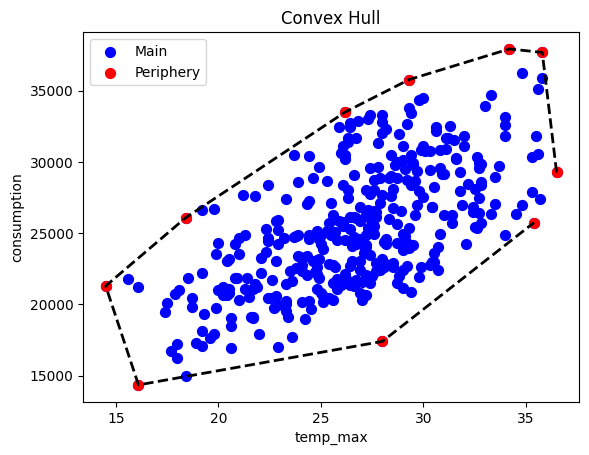

Isolation Forest


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


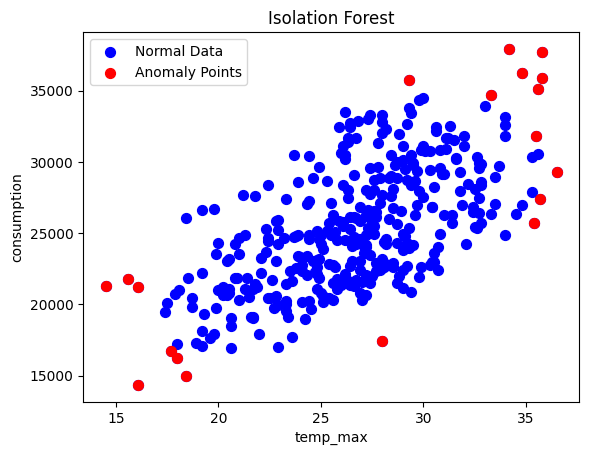

Bounding Box


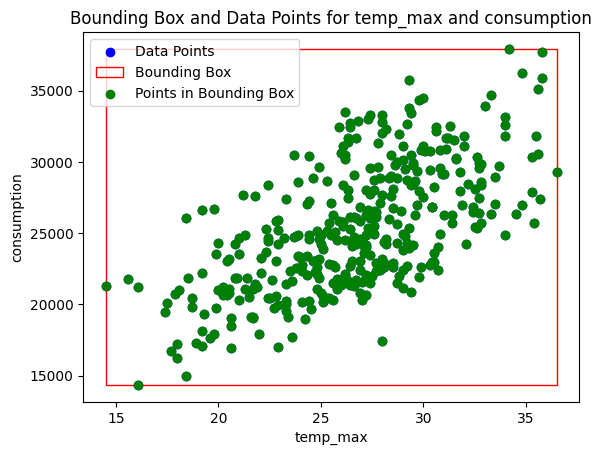

Outliers


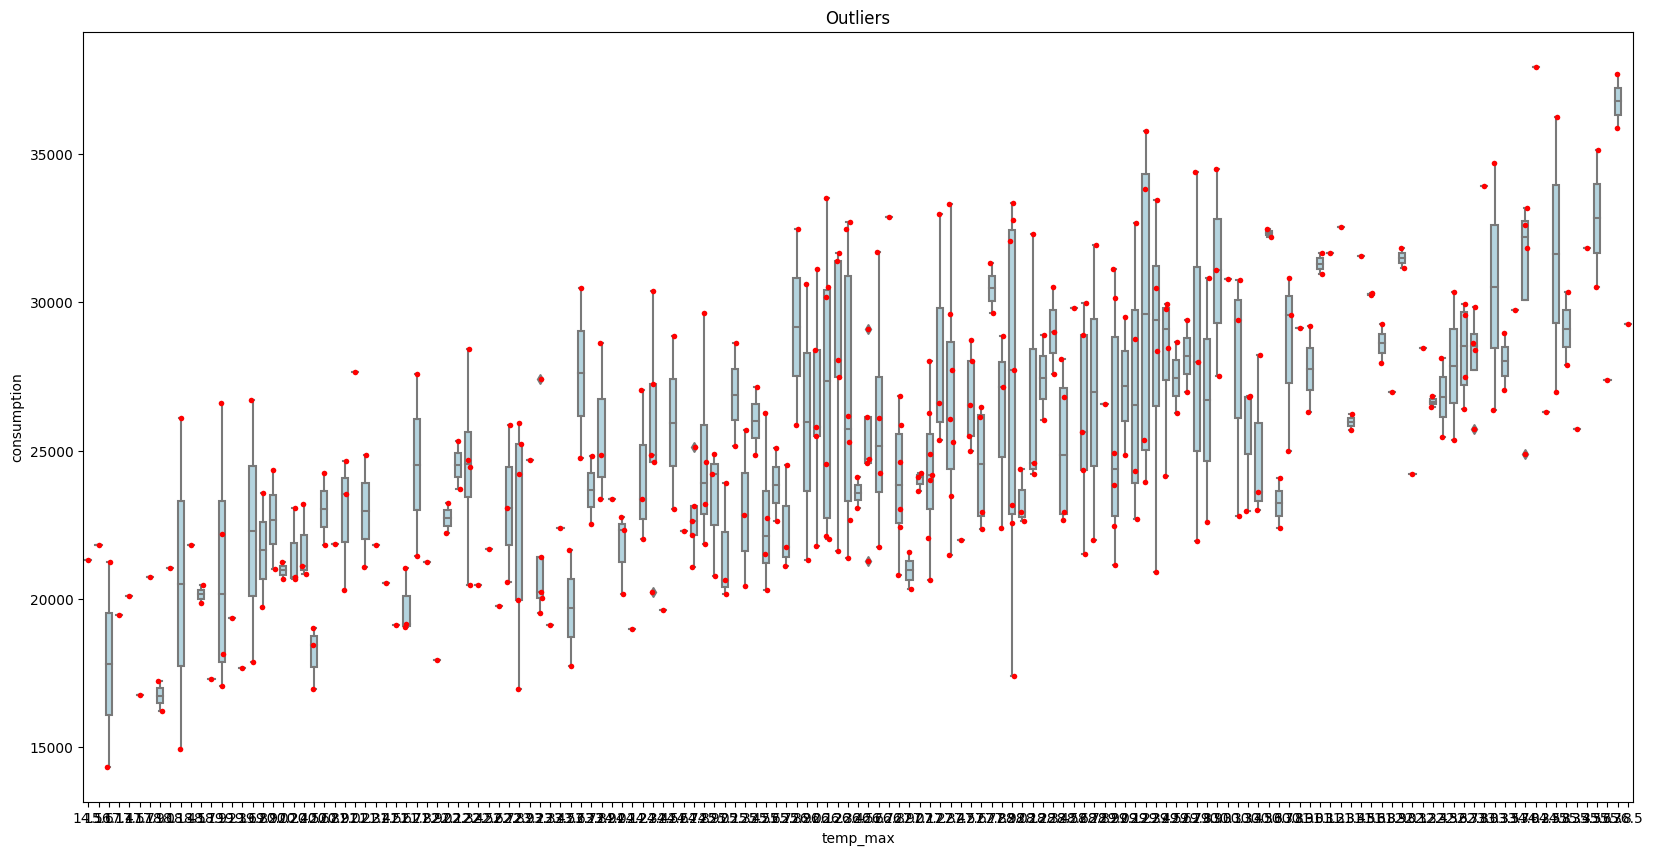

In [13]:
#Read and import file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from sklearn.base import BaseEstimator
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import seaborn as sns
from scipy.spatial import ConvexHull
import requests
from io import StringIO

#df = pd.read_csv('/content/drive/MyDrive/Master/Courses/pandas-completo/Data Science/Beer.csv')
#url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

#Validation Data Prepared
df = upload_file()
selected_column = select_column(df)
cleaned_column = clean_df(selected_column)


#Function
print('Convex Hull')
convex_hull(cleaned_column)
print('Isolation Forest')
isolation_forest(cleaned_column)
print('Bounding Box')
bounding_box(cleaned_column)
print('Outliers')
outliers(cleaned_column)




In [6]:
#Upload File from ChatGpt
def upload_file():
    file_path_or_url = input("Please enter the file path or URL to upload: ")

    try:
        if file_path_or_url.startswith("http"):
            # It's a URL, so fetch the data from the URL
            response = requests.get(file_path_or_url)
            response.raise_for_status()
            content = response.text
            df = pd.read_csv(StringIO(content))
        else:
            # It's a local file, so read it as a CSV
            df = pd.read_csv(file_path_or_url)

        return df

    except requests.exceptions.RequestException as e:
        print("Failed to fetch data from the URL:", str(e))
    except FileNotFoundError:
        print("File not found. Please enter a valid file path.")
    except pd.errors.EmptyDataError:
        print("The file is empty or has no data.")
    except Exception as e:
        print("An error occurred:", str(e))


This code below was my upload file implementatiom, but didn't work with URL and Path so i asked to ChatGPT hHow can i Import a csv file from a path or from a URL in the same fuction, and he gave me this code.


```
def upload_file(): #Upload/Read csv file
    file_path = input("Please enter the file path or URL to upload: ")
    df = pd.read_csv(file_path)
    return df
```


In [7]:
def select_column(data): # Function to select 2 columns in the data to identify the periphery

        print("Columns in the DataFrame:") #Show all columns names to select 2
        for column in data.columns:
            print(column)


        selected_columns = [] #Select 2 columns from the dataset and inclued in a new dataframe
        while len(selected_columns) < 2:
            column_name = input("Enter the name of a column: ")
            if column_name in data.columns:
                selected_columns.append(column_name)
            else:
                print("Please enter a valid column name.")


        selected_df = data[selected_columns]

        return selected_df

In [8]:
#Clean the dataframe
def clean_df(data):
  cleaned_data = data.dropna()
  return cleaned_data

In [9]:
#ConvexHull
def convex_hull(data):
    xy = data.values
    hull = ConvexHull(xy) # Convex Hull is a function where the next convex angle is found.
    periphery_indices = hull.vertices #Set the index os all periphery in a variable
    periphery_indices = periphery_indices.astype(int)
    periphery_points = data.iloc[periphery_indices] #Set the all periphery points in the graphic in a variable
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], s=50, c='b', label='Main') #Plot the all the points in the graphic
    plt.scatter(periphery_points.iloc[:, 0], periphery_points.iloc[:, 1], s=50, c='r', label='Periphery') # Paint the periphery in red and save in graphic
    plt.plot(data.iloc[periphery_indices, 0], data.iloc[periphery_indices, 1], 'k--', lw=2)#Conect all the periphery point with line and save in graphic
    plt.legend()# Display the graphic
    plt.title('Convex Hull')
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.show()# Display the graphic



Convex Hull:
Is good to see the data distribution and the detected outliers.
But is not good with Mult Dimension

In [10]:
#IsolationForest
def isolation_forest(data):

  model = IsolationForest(contamination=0.05)  # Adjust contamination based on your dataset
  model.fit(data) # Fit the model to the data
  outliers = model.predict(data) # Predict anomalies (outliers)
  anomaly_points = data[outliers == -1] # Extract the anomaly points
  plt.scatter(data.iloc[:, 0], data.iloc[:, 1], s=50, c='b', label='Normal Data')
  plt.scatter(anomaly_points.iloc[:, 0], anomaly_points.iloc[:, 1], s=50, c='r', label='Anomaly Points')
  plt.legend()
  plt.xlabel(data.columns[0])
  plt.ylabel(data.columns[1])
  plt.title('Isolation Forest')
  plt.show()

Isolation Forest: s a fast and efficient algorithm for identifying outliers. It's especially useful for large datasets / Mult Dimension. The performace is not good

In [11]:
#Outliers
def outliers(data):
  plt.figure(figsize=(20, 10))
  sns.boxplot(x=data[data.columns[0]], y=data[data.columns[1]], color='lightblue', width=0.6)
  sns.stripplot(x=data[data.columns[0]], y=data[data.columns[1]], color='red', size=4, jitter=0.2)
  plt.xlabel(data.columns[0])
  plt.ylabel(data.columns[1])
  plt.title(f"Outliers")
  plt.show()

Outliers: is good to analise the extremes for each feature and the performace is good to robust data and identify if have any anomaly, but could not be so efective and show some false positives

Bounding Box using ChatGPT
>
Rafael : can you do an exemple of bounding box with python.
>
ChatGPT: Generated
```
# Extract the feature columns
# Calculate the minimum and maximum values for each feature
# Define the bounding box
```
Rafael: how can i do a plot with the anwser in Bounding Box:
```
# Filter points within the bounding box
# Create a scatter plot for all data points
# Create a rectangle for the bounding box
# Plot the
# Highlight points within the bounding box
```
Rafael: ValueError: Can only compare identically-labeled Series objects
---> 19     (X["temp_max"] >= bounding_box["min_temp_max
>
ChatGPT: Fixed the Code, and return the atual code
```
This corrected code should allow you to create a plot with the bounding box and points within the box for your dataset. Make sure to replace "dataset.csv" with the path to your CSV file and adjust the column names as needed.
```














In [12]:
# Bounding Box from ChatGPT
def bounding_box(data):
    # Extract the feature columns
    X = data

    # Calculate the minimum and maximum values for each feature
    min_vals = X.min()
    max_vals = X.max()

    # Define the bounding box using column names
    bounding_box = {
        f'min_{X.columns[0]}': min_vals[0],
        f'max_{X.columns[0]}': max_vals[0],
        f'min_{X.columns[1]}': min_vals[1],
        f'max_{X.columns[1]}': max_vals[1]
    }

    # Filter points within the bounding box
    points_within_box = X[
        (X[X.columns[0]] >= bounding_box[f'min_{X.columns[0]}']) &
        (X[X.columns[0]] <= bounding_box[f'max_{X.columns[0]}']) &
        (X[X.columns[1]] >= bounding_box[f'min_{X.columns[1]}']) &
        (X[X.columns[1]] <= bounding_box[f'max_{X.columns[1]}'])
    ]

    # Create a scatter plot for all data points
    plt.scatter(X[X.columns[0]], X[X.columns[1]], c='b', label='Data Points')

    # Create a rectangle for the bounding box
    rectangle = plt.Rectangle(
        (bounding_box[f'min_{X.columns[0]}'], bounding_box[f'min_{X.columns[1]}']),
        bounding_box[f'max_{X.columns[0]}'] - bounding_box[f'min_{X.columns[0]}'],
        bounding_box[f'max_{X.columns[1]}'] - bounding_box[f'min_{X.columns[1]}'],
        color='r',
        fill=False,
        label='Bounding Box'
    )

    # Plot the rectangle
    plt.gca().add_patch(rectangle)

    # Highlight points within the bounding box
    plt.scatter(points_within_box[X.columns[0]], points_within_box[X.columns[1]], c='g', label='Points in Bounding Box')

    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.legend()
    plt.title(f"Bounding Box and Data Points for {X.columns[0]} and {X.columns[1]}")
    plt.show()



Bounding Box: is good to data exploration to find outliers in the data range but sensitive to the range of data values and may not capture outliers

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Periphery of a dataset is important for assessing a model's generalization, robustness, and its ability to handle unseen or extreme data points, including predictive modeling, anomaly detection, and fairness in machine learning.